# Search Engines Market Analysis

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from itertools import chain

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (18, 10)

np.random.seed(239)

In [2]:
df = pd.read_csv('clean_data.csv', parse_dates=['date'])

## Plots

In [3]:
def line_plot_1(pt):
    ax = pt.plot(linewidth=6.0)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.margins(0)
    ax.set_ylim([25, 50])
    ax.grid('off')
    ax.xaxis.set_ticks(pt.index)
    title = ax.legend(title='Browser', fontsize=13)
    plt.setp(title.get_title(), fontsize=14)
    ax.xaxis.set_label_text('Date', fontsize=15)
    ax.yaxis.set_label_position('left')
    ax.yaxis.set_label_text('Percent, %', fontsize=15)
    ax.set_title('Yandex hits share of search engines by browser', fontsize=20)
    plt.setp(title.get_title(), fontsize=14)
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.yaxis.set_major_locator(ax.yaxis.get_major_locator())
    ax2.grid('off')

In [4]:
def area_plot_2(pt):
    ax = pt.plot(kind='area')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.margins(0)
    ax.set_ylim([0, 100])
    title = ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Browser', fontsize=13)
    ax.xaxis.set_label_text('Date', fontsize=15)
    ax.yaxis.set_label_position('left')
    ax.yaxis.set_label_text('Percent, %', fontsize=15)
    ax.set_title('Total hits percentange of browser', fontsize=20)
    plt.setp(title.get_title(), fontsize=14)
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.yaxis.set_major_locator(ax.yaxis.get_major_locator())
    ax2.grid(ax.grid())

In [5]:
def line_plot_3(pt, ax, browser):
    ax = pt.plot(kind='line', ax=ax, linewidth=4.0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_visible(False)
    title = ax.set_title(f'Search engies share in {browser}', fontsize=15)

## Stories

### Story 1

Как в общих чертах менялась доля Яндекса в исследуемых браузерах?

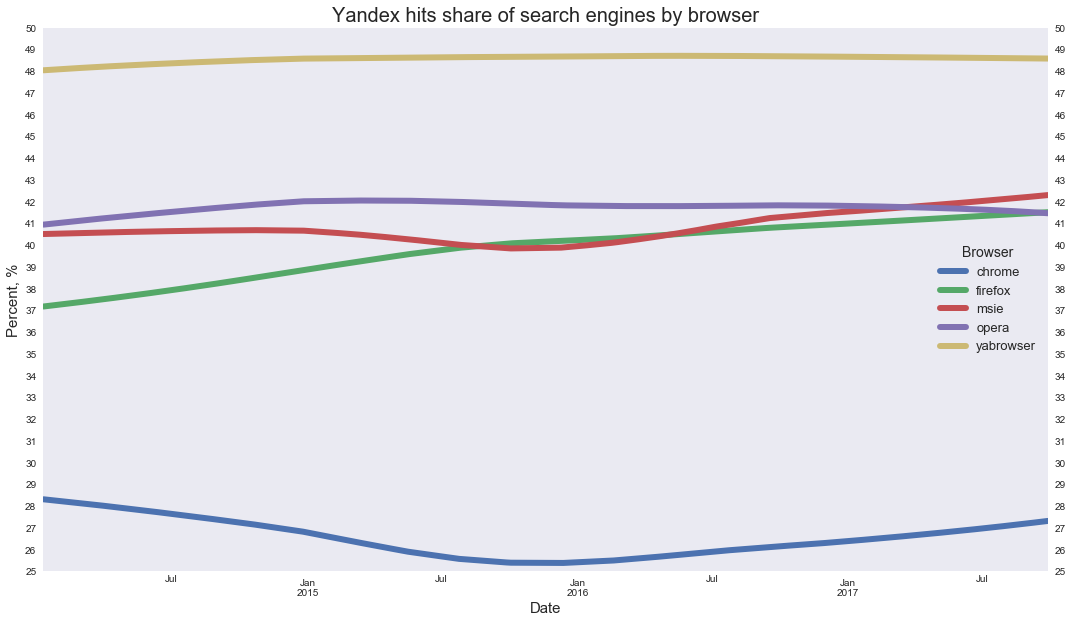

In [6]:
pt = df.pivot_table(index='date', values='hits_year_trend', 
                    columns=['se', 'browser'], aggfunc=np.sum)
pt = (pt['yandex'] / (pt['yandex'] + pt['search'])) * 100
line_plot_1(pt)

На графике изображено изменяющаяся во времени доля Яндекса от всего траффика, генерируемого поисковиками, в процентах по браузерам в период с 2014 по наше время.  
Доля в Яндекс-браузере стабильно высокая (логично) и немного выросла (но совсем немного, поэтому, возможно, стоит активнее смотреть в этом направлении).  
Доля в Хроме немного просела к 2016, но вырояналась в 2017 и вышла на отметку в 27%. Наметился некий позитивный тренд, возможно стоит больше подумать о связи Яндекса и Хрома.  
Аналогичная ситуация наблюдается и у Explorer. Доля растет, но еще недалеко ушла от остальных браузеров. Доля в Firefox заметно увеличилась, возможно еще некоторое время мы будем наблюдать рост.  Про Opera сложно что-либо сказать, тут скорее намечается некое проседание.

### Story 2

Как менялась доля браузеров, если учитывать только поисковую траффикогенерацию?

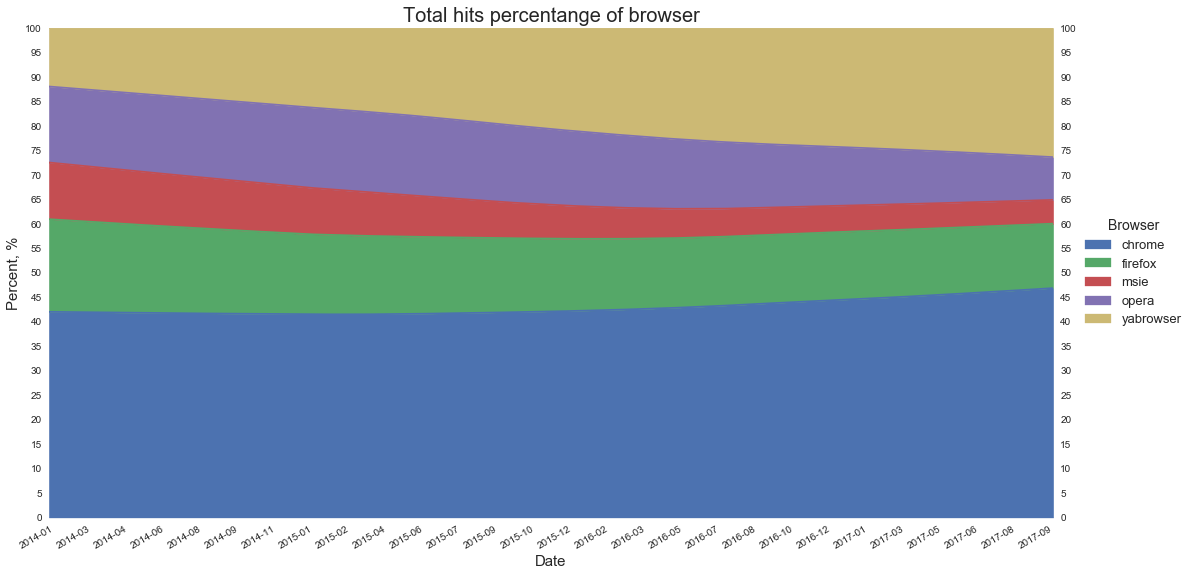

In [7]:
pt = df.pivot_table(index='date', values='hits_year_trend', 
                    columns='browser', aggfunc=np.sum, margins=True)
pt = (pt.iloc[:-1, :-1].div(pt.iloc[:-1, -1], axis=0) * 100)
area_plot_2(pt)

На графике изображено изменяющаяся во времени доля (суммы по поисковикам) траффика браузера в процентах в период с 2014 по наше время.  
Видно, что доля Chrome возросла незначительно. Chrome по прежнему самый стабильный и крупный игрок на рынке.  
Доля Firefox уменьшилась незначительно, уменьшение же у Microsoft Explorer и Opera наблюдается как минимум в два раза.  
Доля Яндекса возросла значительно, поднявшись с 10% до 25%. Видно, что Яндекс делает правильные шаги в нужном направлении.
Прослеживаются тренды к дальнейшему увеличению доли Яндекса и Chrome за счет снижения остальных.

### Story 3

Как менялась доля поисков внутри браузеров?

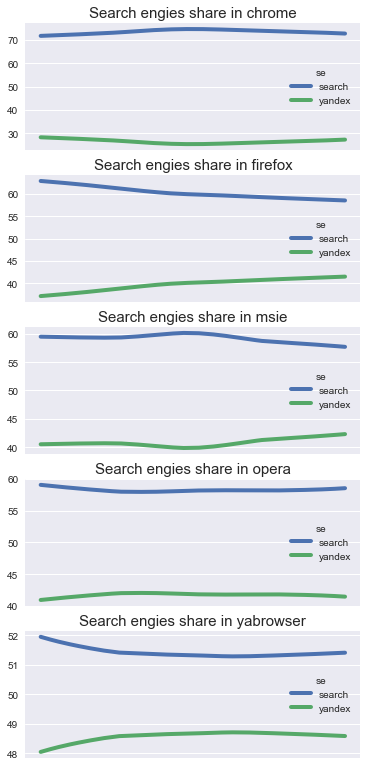

In [8]:
BROWSERS = np.unique(df['browser'])
fig, axes = plt.subplots(len(BROWSERS), figsize=(6, 15))

for browser, ax in zip(BROWSERS, axes):
    pt = df[df.browser == browser]
    pt = pt.pivot_table(index='date', values='hits_year_trend', 
                        columns='se', aggfunc=np.sum, margins=True)
    pt = (pt.iloc[:-1, :-1].div(pt.iloc[:-1, -1], axis=0) * 100)
    line_plot_3(pt, ax, browser)

На граффиках изображена доля траффика по поисковикам Яндекс/Не яндекс. Каждый график соответстсвует траффику в своему браузере.  
Видно, что доля Яндекса везде ниже доли других поисковиков, однако в Яндекс-Браузере она заметна выше остальных. Хуже всего дела обстоят в Хроме.  
Позитивные тренда наблюдаются в Хроме, Firefox и MSIE. У Firefox все совсем хорошо - тренд доля тут всегда увеличивалась и продолжает расти. Возможно, успех этих браузеров чем-то можно объяснить, тогда можно проанализиловать, какие вещи позитивно влияют на долю поисковика Яндекса.  
Доля в Опере и ЯБраузере ведет себя примерно одинаково - проседает к 2016 и начинает убывать. Такой эффект должен чем-то объясняться. Возможно, стоит обратить особое внимание на траффик в конкретно этих двух браузерах.